In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  numpy as np
from keras.utils.np_utils import to_categorical

# Load data

In [2]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [3]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

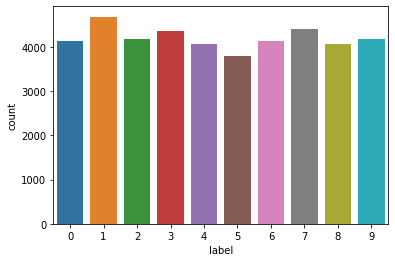

In [6]:
sns.countplot(train['label'])

In [7]:
x_train=train.drop(['label'],1)
y_train=train['label']

In [8]:
x_train=np.array(x_train)
test=np.array(test)

In [9]:
x_train.shape

(42000, 784)

In [10]:
test.shape

(28000, 784)

In [11]:
x_train=x_train.reshape(42000,28,28)
test=test.reshape(28000,28,28)

In [12]:
x_train=x_train/255
test=test/255

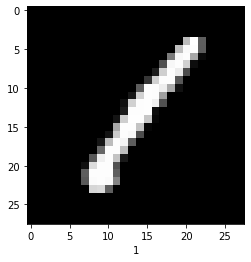

In [13]:
def show_img(i):
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(y_train[i])
show_img(0)

In [14]:
target=x_train.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)
y_train=np.array(y_train)
label=to_categorical(y_train)
label.shape

(42000, 10)

# Model creation

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [16]:
model=Sequential([
    Conv2D(32,(5,5) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(5,5), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Model training

In [18]:
model.fit(target,label,epochs=40,batch_size=64)

Epoch 1/40
657/657 [==============================] - 62s 46ms/step - loss: 0.7861 - accuracy: 0.7402
Epoch 2/40
657/657 [==============================] - 24s 37ms/step - loss: 0.1031 - accuracy: 0.9687
Epoch 3/40
657/657 [==============================] - 22s 34ms/step - loss: 0.0734 - accuracy: 0.9783
Epoch 4/40
657/657 [==============================] - 22s 34ms/step - loss: 0.0586 - accuracy: 0.9827
Epoch 5/40
657/657 [==============================] - 23s 35ms/step - loss: 0.0479 - accuracy: 0.9853
Epoch 6/40
657/657 [==============================] - 23s 36ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 7/40
657/657 [==============================] - 23s 35ms/step - loss: 0.0380 - accuracy: 0.9886
Epoch 8/40
657/657 [==============================] - 23s 35ms/step - loss: 0.0321 - accuracy: 0.9900
Epoch 9/40
657/657 [==============================] - 23s 35ms/step - loss: 0.0320 - accuracy: 0.9895
Epoch 10/40
657/657 [==============================] - 23s 35ms/step - loss: 0.028

Testing model accuracy

In [20]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
from sklearn.metrics import accuracy_score
answ=pd.read_csv('submission.csv')
accuracy_score(answ['Label'],Y_pred_classes)

0.99175

[]

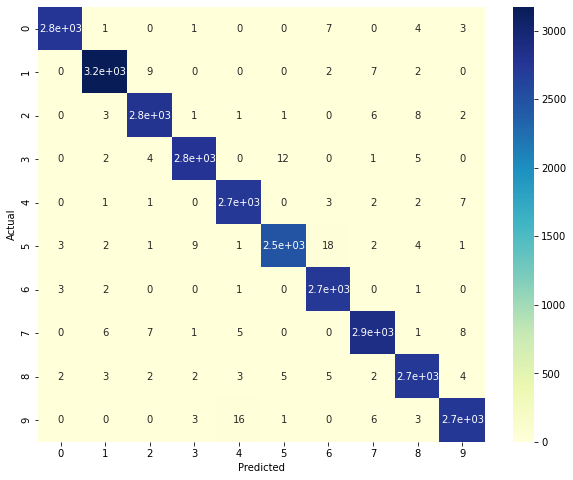

In [21]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(answ['Label'], Y_pred_classes) 
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,annot=True,annot_kws={"size": 10} , cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot()

# Model Testing

In [22]:
def test_output(i):
  plt.imshow(x_train[i],cmap='gray')
  predicted=np.argmax(model.predict(target[i].reshape(-1,28,28,1)))
  actual=np.argmax(label[i])
  plt.xlabel(f'predicted= {predicted}  Actual= {actual}')

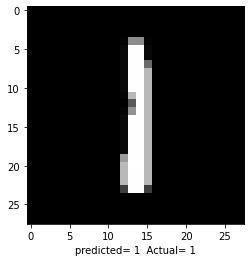

In [23]:
test_output(2)

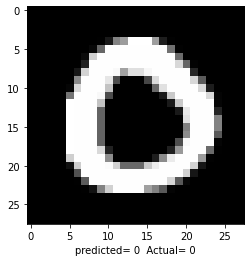

In [24]:
test_output(4)

# Model testing using real world images

In [25]:
from PIL import Image, ImageGrab

In [26]:
def predict_digit1(img):
    img = Image.open(img)
    plt.imshow(img)
    img = img.convert('L', dither=Image.NONE)
    img = img.resize((28,28))
    img = np.array(img)
    img=np.invert(img)
    predicted=np.argmax(model.predict(img.reshape(-1,28,28,1)))
    # plt.imshow(img,interpolation='nearest')
    plt.xlabel(f'Predicted= {predicted}')

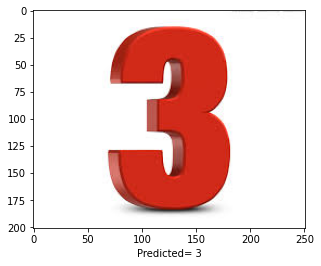

In [28]:
predict_digit1('./Images/images.jfif')

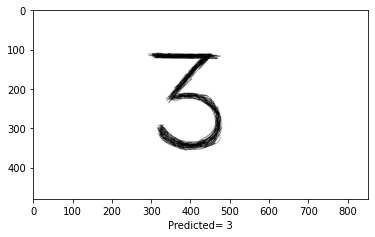

In [29]:
predict_digit1('./Images/1.jpg')

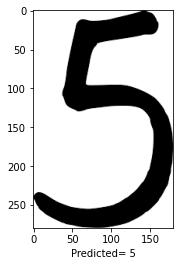

In [30]:
predict_digit1('./Images/download.png')

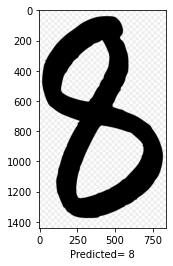

In [31]:
predict_digit1('./Images/531-5314816_handwritten-1-number-9-hand-written-png-transparent.png')